In [1]:
%load_ext sql


/Users/victorvulovic/anaconda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/Users/victorvulovic/anaconda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
%pylab inline  
import pandas as pd
import yaml

Populating the interactive namespace from numpy and matplotlib


In [3]:
pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']
connection_string = 'postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds)

In [4]:
%sql $connection_string

'Connected: student@postgres'

In [5]:
cars_table = %sql SELECT * FROM cars;
cars = cars_table.DataFrame()

398 rows affected.


In [9]:
cars.head(7)

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala


/Users/victorvulovic/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


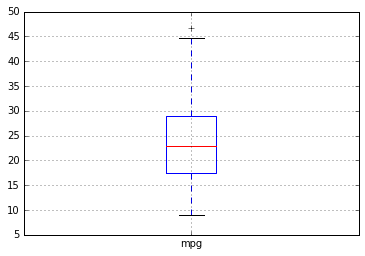

In [13]:
cars.boxplot('mpg');

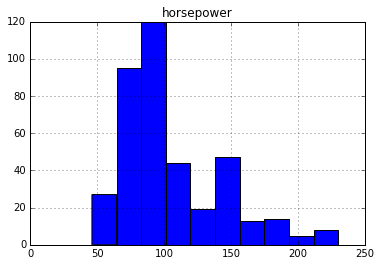

In [15]:
cars.hist('horsepower');

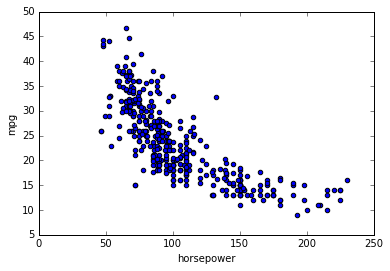

In [18]:
cars.plot.scatter('horsepower', 'mpg');

In [20]:
cars.groupby('model')['weight'].mean()

model
70    3372.793103
71    2995.428571
72    3237.714286
73    3419.025000
74    2877.925926
75    3176.800000
76    3078.735294
77    2997.357143
78    2861.805556
79    3055.344828
80    2436.655172
81    2522.931034
82    2453.548387
Name: weight, dtype: float64

In [21]:
pd.crosstab(cars['origin'], cars['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
1,0,72,0,74,103
2,0,63,3,4,0
3,4,69,0,6,0
